In [1]:
import pandas as pd
import seaborn as sns

from scripts.event_extraction import EventExtractor
from scripts.summarizers.summarizer_bert import BertExtractiveSummarizer
from scripts.summarizers.summarizer_pegasus import PegasusSummarizer
from scripts.summarizers.summarizer_t5 import T5Summarizer


/Users/ernapersonal/PycharmProjects/event-extraction-from-news/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1007)>


In [2]:
df = pd.read_csv("../data/processed/train.csv")
sample = df.loc[0, "clean_text"]
sample


'CNN When it comes to India travel, the state of Punjab, which borders Pakistan, doesn\'t make it to the top of that many itineraries. That\'s good news for intrepid travelers. From temples so gold they\'ll make your eyes water, to food you\'ll be longing for days after it hits your lips, Punjab is India at its colorful, lively best. 1. Harmandir Sahib Golden Temple Located in Amritsar, the holiest shrine of the Sikh religion, Harmandir Sahib Golden Temple , is Punjab\'s top attraction. Reflections of its gold encrusted dome shimmer in the clear water of the Amrit Sarovar Pool of Nectar , which greets those who enter from the north gate, the most impressive of all four entries. To take it all in, it\'s best to simply walk around the marble pathway surrounding the pool. Its waters are said to have healing powers. Devotional music, bathing pilgrims, golden carps and meditating devotees add to the atmosphere. Worth keeping in mind: There\'s a long line to visit the inner sanctum Darbar Sa

In [3]:
event_ex = EventExtractor()
bert = BertExtractiveSummarizer()
peg = PegasusSummarizer()
t5 = T5Summarizer()

bert_summary = bert.summarize(sample)
peg_summary = peg.summarize(sample)
t5_summary = t5.summarize(sample)

event_info = event_ex.extract_event(sample)


/Users/ernapersonal/PycharmProjects/event-extraction-from-news/.venv/lib/python3.10/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model

In [4]:
pd.DataFrame({
    "Model": ["BERT Extractive", "PEGASUS", "T5"],
    "Summary": [bert_summary, peg_summary, t5_summary]
})


,Model,Summary
0,BERT Extractive,"CNN When it comes to India travel, the state o..."
1,PEGASUS,"From the Taj Mahal to the Grand Canyon, from t..."
2,T5,Amritsar is home to a rich culinary heritage. ...


/var/folders/b4/d444n8091h7fgqx4qqqqnlxm0000gq/T/ipykernel_34120/1230751494.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["BERT", "PEGASUS", "T5"], y=lengths, palette="Set2")


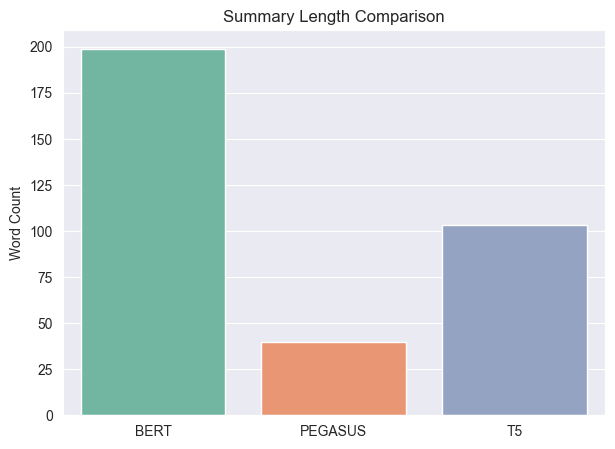

In [5]:
from matplotlib import pyplot as plt

lengths = [
    len(bert_summary.split()),
    len(peg_summary.split()),
    len(t5_summary.split())
]

plt.figure(figsize=(7,5))
sns.barplot(x=["BERT", "PEGASUS", "T5"], y=lengths, palette="Set2")
plt.title("Summary Length Comparison")
plt.ylabel("Word Count")
plt.show()


In [6]:
entities = event_ex.extract_entities(sample)

for label, items in entities.items():
    print(f"{label}: {items}")


ORG: ['CNN']
LOC: ['India', 'Punjab', 'Pakistan', 'Punjab', 'India', 'Harmandir Sahib Golden Temple', 'Amritsar', 'Harmandir Sahib Golden Temple', 'Punjab', 'Amrit Sarovar Pool of', 'Nectar', 'Darbar Sahib', 'Sahib', 'Golden Temple', 'Golden Temple Road', 'Amritsar', 'Punjab', 'Amritsar']
MISC: ['Sikh', 'Sikh', 'Guru Granth', 'Punjabi', 'Indian']


In [7]:
event_info


{'event_type': 'unknown',
 'trigger': None,
 'entities': {'ORG': ['CNN'],
  'LOC': ['India',
   'Punjab',
   'Pakistan',
   'Punjab',
   'India',
   'Harmandir Sahib Golden Temple',
   'Amritsar',
   'Harmandir Sahib Golden Temple',
   'Punjab',
   'Amrit Sarovar Pool of',
   'Nectar',
   'Darbar Sahib',
   'Sahib',
   'Golden Temple',
   'Golden Temple Road',
   'Amritsar',
   'Punjab',
   'Amritsar'],
  'MISC': ['Sikh', 'Sikh', 'Guru Granth', 'Punjabi', 'Indian']}}